In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

In [39]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'

data = pd.read_csv(source, sep=';')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [40]:
data.drop(['Set'], axis = 1, inplace = True)


## Haciendo una conversión de variables ordinales manualmente

In [41]:
label = list(data['Spending_Score'].unique()) # se crea una lista con las etiquetas
num = [1,2,3] # lista de valores numéricos para cada etiqueta
mapping = {}  # diccionario de equivalencia entre listas

for x,y in enumerate(label):
    mapping[y] = num[x]

print(mapping)

{'Low': 1, 'Average': 2, 'High': 3}


In [42]:
data.Spending_Score = data.Spending_Score.map(mapping)

In [43]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,2,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,3,6.0


In [49]:
X = data.drop(['Spending_Score', 'ID'], axis = 1)
Y = data[['Spending_Score']]

In [50]:
Y = LabelEncoder().fit_transform(Y)

tareas = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder())]
                            
pipe = Pipeline(tareas)
X2 = pipe.fit_transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
Xframe = pd.DataFrame(X2, columns=X.columns)
Xframe.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size
0,1.0,0.0,4.0,0.0,5.0,1.0,3.0
1,0.0,1.0,18.0,1.0,2.0,1.0,2.0
2,0.0,1.0,44.0,1.0,2.0,1.0,0.0
3,1.0,1.0,44.0,1.0,7.0,0.0,1.0
4,0.0,1.0,20.0,1.0,3.0,1.0,5.0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(X2,Y, random_state = 2)

In [60]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(x_train, y_train)

[Text(146.475, 195.696, 'Ever_Married <= 0.5\ngini = 0.553\nsamples = 8021\nvalue = [4844, 1950, 1227]\nclass = Low'),
 Text(125.55000000000001, 152.208, 'gini = 0.0\nsamples = 3239\nvalue = [3239, 0, 0]\nclass = Low'),
 Text(167.4, 152.208, 'Family_Size <= 0.5\ngini = 0.655\nsamples = 4782\nvalue = [1605, 1950, 1227]\nclass = Average'),
 Text(83.7, 108.72, 'Age <= 15.5\ngini = 0.089\nsamples = 587\nvalue = [560, 8, 19]\nclass = Low'),
 Text(41.85, 65.232, 'Work_Experience <= 0.5\ngini = 0.245\nsamples = 28\nvalue = [24, 0, 4]\nclass = Low'),
 Text(20.925, 21.744, 'gini = 0.5\nsamples = 4\nvalue = [2, 0, 2]\nclass = Low'),
 Text(62.775000000000006, 21.744, 'gini = 0.153\nsamples = 24\nvalue = [22, 0, 2]\nclass = Low'),
 Text(125.55000000000001, 65.232, 'Profession <= 5.5\ngini = 0.08\nsamples = 559\nvalue = [536, 8, 15]\nclass = Low'),
 Text(104.625, 21.744, 'gini = 0.109\nsamples = 367\nvalue = [346, 8, 13]\nclass = Low'),
 Text(146.475, 21.744, 'gini = 0.021\nsamples = 192\nvalue = [

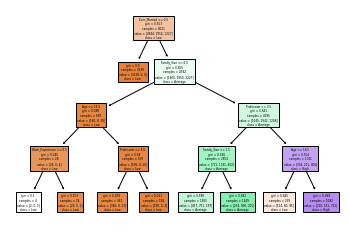

In [63]:
plot_tree(tree, feature_names = X.columns, class_names=label, filled = True)

## Laboratorio 2

Comparar el modelo de clasificación de árbol con knn.

1. Graficar matriz de confusión de los dos modelos (15% de la nota)

2. Mostrar reporte de métricas de los dos modelos   (15% de la nota)

3. Analizar qué modelos tienen mejores resultados   (15% de la nota)

4. Crear un pipeline que ejecute los dos modelos, después de haber realizado el tratamiento de datos  (15% de la nota)

5. Investigue cómo funcionan los Árboles de Regresión y aplíquelo al ejercicio de los precios de los carros (40% de la nota)